# EQUITY VARIANCE SWAP - VALUATION AND RISK ANALYSIS

Valuation and Risk of Equity Chooser Options in which the option is on a basket of stocks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves import *
from financepy.products.equity import *
from financepy.market.volatility import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:58 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



# Variance Swap

All the assets in the basket have the same characteristicsm

In [3]:
startDate = FinDate(2018, 3, 20)
tenor = "3M"
strike = 0.3*0.3

In [4]:
print("Strike Variance:", strike)

Strike Variance: 0.09


The strike of the variance swap is at 9%

In [5]:
volSwap = FinEquityVarianceSwap(startDate, tenor, strike)

## Valuation

In [6]:
valueDate = FinDate(2018, 3, 20)

In [7]:
r = 0.05
discountCurve = FinDiscountCurveFlat(valueDate, r)

In [8]:
stockPrice = 100.0
dividendYield = 0.0
maturityDate = startDate.addMonths(3)

In [9]:
def volSkew(K, atmVol, atmK, skew):
    v = atmVol + skew * (K-atmK)
    return v

We now define the volatility curve

In [16]:
atmVol = 0.20
atmK = 100.0
skew = 0
strikes = np.linspace(50.0, 135.0, 18)
vols = volSkew(strikes, atmVol, atmK, skew)
volCurve = FinEquityVolCurve(valueDate, maturityDate, strikes, vols)

Text(0, 0.5, 'Volatility')

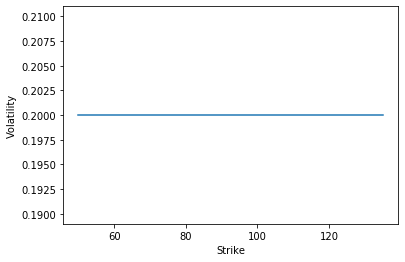

In [17]:
plt.plot(strikes, vols)
plt.xlabel("Strike")
plt.ylabel("Volatility")

In [18]:
strikeSpacing = 5.0
numCallOptions = 10
numPutOptions = 10

In [19]:
k1 = volSwap.fairStrike(valueDate, stockPrice, dividendYield,
                        volCurve, numCallOptions, numPutOptions,
                        strikeSpacing, discountCurve, False)
print("Fair strike:", k1)

Fair strike: 0.04166201229676547


In [20]:
k2 = volSwap.fairStrikeApprox(valueDate, stockPrice, strikes, vols)
print("DERMAN SKEW APPROX for K:", k2)

DERMAN SKEW APPROX for K: 0.04000000000000001


In [21]:
volSwap.printWeights()

TYPE STRIKE WEIGHT
PUT   55.00  13169.839
PUT   60.00  11058.975
PUT   65.00   9418.167
PUT   70.00   8117.442
PUT   75.00   7068.860
PUT   80.00   6211.188
PUT   85.00   5500.721
PUT   90.00   4905.588
PUT   95.00   4402.101
PUT  100.00   2052.402
CALL  100.00   1919.957
CALL  105.00   3602.627
CALL  110.00   3282.228
CALL  115.00   3002.757
CALL  120.00   2757.527
CALL  125.00   2541.164
CALL  130.00   2349.307
CALL  135.00   2178.390
CALL  140.00   2025.471
CALL  145.00   1888.110


Copyright (c) 2020 Dominic O'Kane